In [1]:
#import all the necessary modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn import svm
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
import math
from  numpy import random
from sklearn.model_selection import train_test_split

In [2]:
#READ THE FEATURES FROM THE FILES
all_data = pd.read_csv('new_data2_classes.csv')

# transform the the data into numerical using label encoder
for keys_ in all_data.keys():
    if isinstance(all_data[keys_][0], str):
      all_data[keys_] = LabelEncoder().fit_transform(all_data[keys_].tolist())
      # print(all_data[keys_][:5])
# all_data.head()
all_data = all_data.dropna()
all_data = all_data.drop_duplicates()
features = all_data.drop(columns=['target'])
# features = OneHotEncoder().fit_transform(features)
labels= all_data['target']
features.head()


,Unnamed: 0,IMPORTER_NAME,DECLARANT_NAME,CTY_ORIGIN,MODE_OF_TRANSPORT,HS_DESC,ITM_NUM,QTY,GROSS_MASS,NET_MASS,ITM_PRICE,STATISTICAL_VALUE,TOTAL_TAX,INVOICE_AMT
0,0,31208,1605,14,3,5,1.000000,39,54255.0,54255.0,8548650,10336812.0,1241543,8548650
1,1,28257,1395,34,3,5,1.000000,451,9163.0,9163.0,12511880,14003558.0,944328,12511880
2,2,14327,485,96,3,5,1.000000,1,100.0,100.0,473841,512695.0,383905,1587602
3,3,13878,1602,34,3,10,0.333333,235,5000.0,5000.0,1441725,1692495.0,1088758,7717523
4,4,24274,1253,34,3,10,0.666667,546,6000.0,6000.0,3974100,4317755.0,1595116,10699500


In [3]:
#NUMBER OF SAMPLES
len(features)

300000

In [4]:
#REMOVE IRRELEVANT FEATURE, MANUALLY
features = all_data.drop(columns=['Unnamed: 0'])
features.head()

,IMPORTER_NAME,DECLARANT_NAME,CTY_ORIGIN,MODE_OF_TRANSPORT,HS_DESC,ITM_NUM,QTY,GROSS_MASS,NET_MASS,ITM_PRICE,STATISTICAL_VALUE,TOTAL_TAX,INVOICE_AMT,target
0,31208,1605,14,3,5,1.000000,39,54255.0,54255.0,8548650,10336812.0,1241543,8548650,0
1,28257,1395,34,3,5,1.000000,451,9163.0,9163.0,12511880,14003558.0,944328,12511880,0
2,14327,485,96,3,5,1.000000,1,100.0,100.0,473841,512695.0,383905,1587602,0
3,13878,1602,34,3,10,0.333333,235,5000.0,5000.0,1441725,1692495.0,1088758,7717523,0
4,24274,1253,34,3,10,0.666667,546,6000.0,6000.0,3974100,4317755.0,1595116,10699500,0


In [5]:
#REMOVE IRRELEVANT FEATURE, MANUALLY
features.drop(columns=['IMPORTER_NAME'])

,DECLARANT_NAME,CTY_ORIGIN,MODE_OF_TRANSPORT,HS_DESC,ITM_NUM,QTY,GROSS_MASS,NET_MASS,ITM_PRICE,STATISTICAL_VALUE,TOTAL_TAX,INVOICE_AMT,target
0,1605,14,3,5,1.000000,39,54255.0,54255.0,8548650,10336812.0,1241543,8548650,0
1,1395,34,3,5,1.000000,451,9163.0,9163.0,12511880,14003558.0,944328,12511880,0
2,485,96,3,5,1.000000,1,100.0,100.0,473841,512695.0,383905,1587602,0
3,1602,34,3,10,0.333333,235,5000.0,5000.0,1441725,1692495.0,1088758,7717523,0
4,1253,34,3,10,0.666667,546,6000.0,6000.0,3974100,4317755.0,1595116,10699500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,49,112,3,20,1.000000,1,500.0,500.0,884735,884735.0,256974,884735,1
299996,284,60,4,20,0.500000,168,73920.0,73920.0,97216679,114258777.0,33628992,101609995,1
299997,838,34,3,5,0.333333,1605,36000.0,36000.0,19784288,21861012.0,1889267,21740288,1
299998,137,130,3,5,1.000000,1,45.0,45.0,327392,359582.0,43506,327392,1


In [6]:
#TRANSFORM FEATURES USING 1 HOT ENCODER
features_new = OneHotEncoder().fit_transform(features)

In [7]:
#VIEW  FEATURES DIMENSION
features_new.shape

(300000, 733804)

In [8]:
#NORMALIZATION USING STANDARD SCALER
scaler = StandardScaler()
features = (scaler.fit_transform(features))

In [9]:
print(features.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
#PERCENTILE SELECTION
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore');
selector=SelectPercentile(f_classif, percentile=100)
new_features = selector.fit_transform(features,labels)
new_features.shape


(300000, 14)

In [11]:
#RANDOMLY SHUFFLE SAMPLES
import random

randomizer= list(range(len(labels)))
random.shuffle(randomizer)

new_features  = new_features[randomizer]
labels = labels[randomizer]

In [12]:
new_features[:2]

array([[-1.3466986 ,  1.64306642,  1.51669628,  0.02849536,  0.67182256,
        -0.96704952, -0.10099374, -0.07608918, -0.07546205, -0.00280839,
        -0.00295544, -0.05663419, -0.00291916,  0.70710678],
       [ 0.28276347, -0.18622058,  1.479772  ,  0.88524092, -0.3111454 ,
         0.7599201 , -0.09912707, -0.06253851, -0.06189183, -0.00277913,
        -0.00291211, -0.06100436, -0.00294756, -1.41421356]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(new_features, labels, test_size=0.3, shuffle= True)
print('len of x_train' , len(X_train))
print('len of y_train' , len(y_train))
print('len of y_test' , len(y_test))
print('len of x_test' , len(X_test))

len of x_train 210000
len of y_train 210000
len of y_test 90000
len of x_test 90000


In [14]:
#LOAD KNN FOR FIREFLY ALGORITHM
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#  clf = svm.SVC(kernel='poly')
#  clf = RandomForestClassifier()
clf = KNeighborsClassifier()
#  clf.fit(X_train, y_train)

In [15]:
X_FIRE_FLY = X_train[:1000]
Y_FIRE_FLY = y_train[:1000]

In [17]:
#FIREFLY ALGORITHM
from sklearn import svm
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
import math
from  numpy import random
class FireflyAlgorithm():

    def __init__(self, function):
        self.D = 14  # dimension of the problem (Gene number)
        self.NP = 5  # population size (Firefly number)
        self.nFES = 1  # number of function evaluations (repeate number)
        self.alpha = 1  # alpha parameter,(randomization parameter)
        self.betamin = 0.5  # beta parameter
        self.gamma = 1  # gamma parameter (light intensity coefficency)
        # sort of fireflies according to fitness value
        self.Index = [0] * self.NP
        self.Fireflies = [[np.random.rand() for i in range(self.D)] for j in range(self.NP)]  # firefly agents,
        self.Fireflies_tmp = [[np.random.rand() for i in range(self.D)] for j in range(
            self.NP)]  # intermediate pop
        self.Fitness = [0.0] * self.NP  # fitness values (Accuracy)
        self.I = [0.0] * self.NP  # light intensity
        self.nbest = [0.0] * self.NP  # the best solution found so far
        self.LB = 0  # lower bound
        self.UB = 1  # upper bound
        self.fbest = None  # the best
        self.evaluations = 0
        self.Fun = function

    def alpha_new(self, a):
        delta = 1.0 - math.pow((math.pow(10.0, -4.0) / 0.9), 1.0 / float(a))
        return (1 - delta) * self.alpha

    def sort_ffa(self):  # implementation of bubble sort

        for i in range(self.NP):
            self.Index[i] = i

        for i in range(0, (self.NP - 1)):
            j = i + 1
            for j in range(j, self.NP):
                if (self.I[i] > self.I[j]):
                    z = self.I[i]  # exchange attractiveness
                    self.I[i] = self.I[j]
                    self.I[j] = z
                    z = self.Fitness[i]  # exchange fitness
                    self.Fitness[i] = self.Fitness[j]
                    self.Fitness[j] = z
                    z = self.Index[i]  # exchange indexes
                    self.Index[i] = self.Index[j]
                    self.Index[j] = z


    def replace_ffa(self):  # replace the old population according to the new Index values
        # copy original population to a temporary area
        for i in range(self.NP):
            for j in range(self.D):
                self.Fireflies_tmp[i][j] = self.Fireflies[i][j]

        # generational selection in the sense of an EA
        for i in range(self.NP):
            for j in range(self.D):
                self.Fireflies[i][j] = self.Fireflies_tmp[self.Index[i]][j]

    def FindLimits(self, k):
        for i in range(self.D):
            if self.Fireflies[k][i] < self.LB:
                self.Fireflies[k][i] = self.LB
            if self.Fireflies[k][i] > self.UB:
                self.Fireflies[k][i] = self.UB

    def move_ffa(self):
        for i in range(self.NP):
            scale = abs(self.UB - self.LB)
            for j in range(self.NP):
                r = 0.0
                for k in range(self.D):
                    r += (self.Fireflies[i][k] - self.Fireflies[j][k]) * \
                        (self.Fireflies[i][k] - self.Fireflies[j][k])
                r = math.sqrt(r)
                if self.I[i] > self.I[j]:  # brighter and more attractive
                    beta0 = 1.0
                    beta = (beta0 - self.betamin) * math.exp(-self.gamma * math.pow(r, 2.0)) + self.betamin
                    for k in range(self.D):
                        r = random.uniform(0, 1)
                        tmpf = self.alpha * (r - 0.5) * scale
                        self.Fireflies[i][k] = self.Fireflies[i][
                            k] * (1.0 - beta) + self.Fireflies_tmp[j][k] * beta + tmpf
            self.FindLimits(i)

    def Run(self):
        while self.evaluations < self.nFES:
            print(self.evaluations, '----', self.nFES)

            # optional reducing of alpha
            #self.alpha = self.alpha_new(self.nFES/self.NP)
            self.evaluations = self.evaluations + 1
            # evaluate new solutions
            for i in range(self.NP):
                print('evaluating..solutions')
                self.Fitness[i] = self.Fun(self.Fireflies[i])

                self.I[i] = self.Fitness[i]


            # ranking fireflies by their light intensit
            self.sort_ffa()
            # replace old population
            self.replace_ffa()
            # move all fireflies to the better locations
            self.move_ffa()

        bestFirefly = self.Fireflies[self.NP - 1]

        return bestFirefly

def evaluation(feature_possibilities):
        feature_possibilities = np.round(feature_possibilities)

        feature_possibilities = feature_possibilities > np.float32(0.5)

        selectedX = X_FIRE_FLY[:, feature_possibilities]

        s = KNeighborsClassifier()

        loocv = LeaveOneOut()
        evaluation = cross_val_score(s, selectedX, Y_FIRE_FLY,  cv=loocv)

        return evaluation.mean()

In [18]:
#RUN FIREFLY ALGORITHM
Algorithm = FireflyAlgorithm(evaluation)
Best = Algorithm.Run()



0 ---- 1
evaluating..solutions
evaluating..solutions
evaluating..solutions
evaluating..solutions
evaluating..solutions


In [19]:
#PRINT RESULTS AND SELECT THE FEATURES
a = np.round(Best)
feature_take_or_not = a > np.float32(0.5)

print(feature_take_or_not)

print(Best)

true_number = np.array(np.unique(feature_take_or_not, return_counts=True)).T
bestX = X_test[:, feature_take_or_not]

X_train =   X_train[:, feature_take_or_not]
X_test = X_test[:, feature_take_or_not]
# X_train, X_test, y_train, y_test = train_test_split(bestX, y_test, test_size=0.2, random_state=42)
# print(bestX.shape)
# s = KNeighborsClassifier()
# loocv = LeaveOneOut()
# evaluation = cross_val_score(s, X_train, y_train,  cv=loocv)
# print("Final Accuracy: %.6f%% (%.6f%%)" % (evaluation.mean(), evaluation.std()))

[ True False  True  True  True  True  True  True False False  True False
 False  True]
[0.8334657825347882, 0.49859062615184013, 0.9854265104709928, 0.5759116954566937, 0.6721299234368364, 0.8259269226170216, 0.7404152012561307, 0.6969615179333275, 0.2470964917991605, 0.1356815630111491, 0.6137289971567746, 0.40629833717591857, 0.3450132991755407, 0.6234441657544448]


In [20]:
#SHOW NUMBER OF FEATURES SELECTED
X_test[0].shape

(9,)

In [22]:
# FF-NN-GA OPTIMIZED
import tensorflow.keras
from sklearn.metrics import accuracy_score


data_inputs = X_test
data_outputs = y_test

input_layer  = tensorflow.keras.layers.Input(X_test[0].shape)
dense_layer1 = tensorflow.keras.layers.Dense(5, activation="relu")
output_layer = tensorflow.keras.layers.Dense(1, activation="linear")

model = tensorflow.keras.Sequential()
model.add(input_layer)
model.add(dense_layer1)
model.add(output_layer)

import pygad.kerasga

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)
    
    # bce = tensorflow.keras.losses.BinaryCrossentropy()
    # solution_fitness = 1.0 / (bce(data_outputs, predictions).numpy() + 0.00000001)
    solution_fitness = accuracy_score(data_outputs, predictions.round())
    return solution_fitness
    
def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

num_generations = 100
num_parents_mating = 5
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)
ga_instance.run()


Generation = 1
Fitness    = 0.3056333333333333
Generation = 2
Fitness    = 0.3056333333333333
Generation = 3
Fitness    = 0.3138444444444444
Generation = 4
Fitness    = 0.3537666666666667
Generation = 5
Fitness    = 0.3537666666666667
Generation = 6
Fitness    = 0.3537666666666667
Generation = 7
Fitness    = 0.4241
Generation = 8
Fitness    = 0.4241
Generation = 9
Fitness    = 0.4241
Generation = 10
Fitness    = 0.4241
Generation = 11
Fitness    = 0.4241
Generation = 12
Fitness    = 0.46445555555555557
Generation = 13
Fitness    = 0.46445555555555557
Generation = 14
Fitness    = 0.46445555555555557
Generation = 15
Fitness    = 0.46445555555555557
Generation = 16
Fitness    = 0.46445555555555557
Generation = 17
Fitness    = 0.46445555555555557
Generation = 18
Fitness    = 0.46445555555555557
Generation = 19
Fitness    = 0.46445555555555557
Generation = 20
Fitness    = 0.46445555555555557
Generation = 21
Fitness    = 0.46445555555555557
Generation = 22
Fitness    = 0.6189111111111111
Gen

Parameters of the best solution : [ 0.16012648  0.53998415 -0.20161671  0.03519571  1.10676533  0.02463726
 -0.98327413  0.43427818 -0.05790838 -0.13326598  0.07897712  0.08946076
  0.6105555   0.03852771 -1.28627449  1.23240266  1.71518604  0.17656509
  0.07913293  0.00245304  0.39671922 -0.14415585  1.03384366  0.03919794
  0.11975774  0.84523072  0.59521132  0.55457194 -0.01405078  2.215217
  0.80504371 -0.9539565   0.66802588 -0.86990556 -1.48544088  0.31553414
  1.01899104  1.89712281  0.66513635 -0.76760831  0.67897089  0.42196861
  0.6305623   1.39222666 -0.50171152 -0.51965283 -0.72753014 -0.6065256
  0.45040811 -0.22392461  0.15909187 -0.19074797 -0.16819614  0.7230328
  0.0584896   0.06331481]
Fitness value of the best solution = 0.9886666666666667


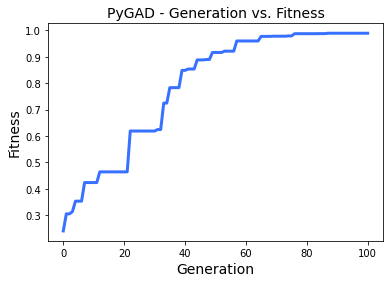

56

In [24]:
# SHOW THE RESULTS OF THE SELECTION
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
ga_instance.plot_fitness()
len(solution)
# prediction = np.sum(np.array(function_inputs)*solution)
# print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

In [1]:
# FIT ORDINARY KNN MODEL
clf.fit(X_train, y_train)


NameError: name 'clf' is not defined

In [23]:
#COMPUTE THE ACCURACY OF THE KNN 
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9998

In [ ]:
#OTHER METRICS OF THE  KNN MODEL
from sklearn import metrics
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
print("Confusion Matrix :", metrics.confusion_matrix(y_test, y_pred))

Precision:  0.999749360870219
Recall:  0.9999665741885885
Accuracy:  0.9998111111111111
Confusion Matrix : [[30151    15]
 [    2 59832]]


In [2]:
# Precision-Recall curve OF THE KNN
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="KNN classifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


NameError: name 'clf' is not defined

In [27]:
# X_train.shape
# features = features[:, features_index]

# features = OneHotEncoder().fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, shuffle= True)
print('Length of training set', (X_train.shape))
print('Length of test set', (X_test.shape))

Length of training set (210000, 14)
Length of test set (90000, 14)


In [24]:
# ORDINARY NEURAL NETWORK.
no_epochs = 10
from tensorflow import keras as ks
input_data_shape = X_train[0].shape
input_data_shape
hidden_activation_function = 'softsign'
output_activation_function = 'sigmoid'
nn_model = ks.models.Sequential()
nn_model.add(ks.layers.Flatten(input_shape=(X_train.shape[1],), name='Input_layer'))
# nn_model.add(ks.layers.Dense(13, activation=hidden_activation_function, name='Hidden_layer'))
# nn_model.add(ks.layers.Dense(10, activation=hidden_activation_function, name='Hidden_layer2'))
# nn_model.add(ks.layers.Dense(7, activation=hidden_activation_function, name='Hidden_layer3'))
nn_model.add(ks.layers.Dense(3, activation=hidden_activation_function, name='Hidden_layer4'))
# nn_model.add(ks.layers.Dense(2, activation=hidden_activation_function, name='Hidden_layer5'))
nn_model.add(ks.layers.Dense(1, activation=output_activation_function, name='Output_Layer'))
optimizer = 'adam'
loss_function = 'binary_crossentropy'
metricx = ['accuracy', ks.metrics.Recall(), ks.metrics.Precision()]
nn_model.compile(optimizer=optimizer, loss=loss_function, metrics=metricx)


In [25]:
print('len of X_train', len(X_train))

len of X_train 210000


In [26]:
# FIT THE NEURAL NETWORK
history = nn_model.fit(X_train, y_train, epochs=no_epochs, validation_data=(X_test,y_test))
# nn_model.save('custom_model_1_epoch.h5')


Epoch 1/10
3809/6563 [================>.............] - ETA: 9s - loss: 0.6304 - accuracy: 0.6719 - recall: 0.9703 - precision: 0.6767

KeyboardInterrupt: 

In [30]:
# OTH METRICS FOR THE NEURAL NETWORK.
from sklearn import metrics
y_pred = nn_model.predict(X_test)
print("Precision: ",metrics.precision_score(y_test, y_pred, average = 'macro'))
print("Recall: ",metrics.recall_score(y_test,y_pred, average = 'macro'))
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
print("Confusion Matrix :", metrics.confusion_matrix(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_true, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(nn_model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

NameError: ignored

In [39]:
# nn_model.save('custom_model_1_epoch.h5')
from sklearn import metrics
y_pred = nn_model.predict(X_test)
print(y_pred.round()[75:100])
print(y_test[75:100])
# print(y_test)
# print("Precision:",metrics.precision_score(y_test, y_pred.round().astype(int).argmax(axis=1), average = 'macro'))
# print("Recall:",metrics.recall_score(y_test,y_pred.round().astype(int).argmax(axis=1), average = 'macro'))
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round().astype(int).argmax(axis=1)))

[[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]]
21920     0
122534    1
222118    1
14037     0
82368     0
249937    1
295624    1
177967    1
206998    1
176244    1
56879     0
263371    1
254118    1
193133    1
158576    1
45478     0
50653     0
15097     0
234918    1
119315    1
296189    1
140248    1
170300    1
14093     0
289095    1
Name: target, dtype: int64


In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'recall_2', 'precision_2', 'val_loss', 'val_accuracy', 'val_recall_2', 'val_precision_2'])

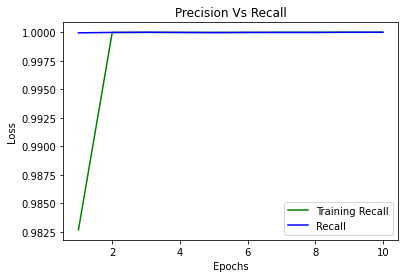

In [48]:
import matplotlib.pyplot as plt

loss_train = history.history['recall_2']
loss_val = history.history['val_recall_2']
epochs = range(1,no_epochs+1)
plt.plot(epochs, loss_train, 'g', label='Training Recall')
plt.plot(epochs, loss_val, 'b', label='Recall')
plt.title('Precision Vs Recall')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

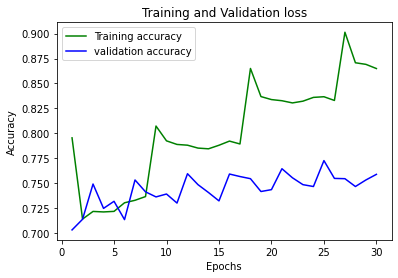

In [ ]:
import matplotlib.pyplot as plt

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,30+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = nn_model.predict(X_test)
[i for i in y_pred]
# accuracy_score(y_test, )

ValueError: ignored

In [ ]:
# X_test = X_test[:, features]
y_pred = clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4886195286195286